In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Underfitting vs. Overfitting

Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html.

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

In [2]:
import numpy             as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

The function $f(X)$ is defined such that we have
$$ f(x) = \cos\left(\frac{3}{2} \cdot\pi\cdot x\right). $$ 

In [4]:
def f(X):
    return np.cos(1.5 * np.pi * X)

We generate $N = 30$ data points of the form $(x, f(x) + \mathtt{noise})$ randomly.  The noise is made from small random numbers.

In [5]:
np.random.seed(0)
N = 30
X = np.sort(np.random.rand(N))
y = f(X) + np.random.randn(N) * 0.1
X = np.reshape(X, (N, 1))

In [6]:
np.random.randn(N) * 0.1

array([-0.05108051, -0.11806322, -0.00281822,  0.04283319,  0.00665172,
        0.03024719, -0.06343221, -0.03627412, -0.06724604, -0.03595532,
       -0.08131463, -0.17262826,  0.01774261, -0.04017809, -0.16301983,
        0.04627823, -0.09072984,  0.00519454,  0.07290906,  0.01289829,
        0.11394007, -0.12348258,  0.04023416, -0.06848101, -0.08707971,
       -0.05788497, -0.03115525,  0.00561653, -0.11651498,  0.09008265])

The function $\texttt{model_and_plot}$ takes a natural number $k$ as input and creates a model that uses all of the numbers
$$ x^0, x^1, x^2, \cdots, x^k $$
as features.  The resulting model is plotted together with the data.

In [7]:
X_test = np.linspace(0, 1, 500)
X_test = np.reshape(X_test, (len(X_test), 1))

In [8]:
def model_and_plot(k, X, y, X_test):
    polynomial_features = PolynomialFeatures(degree=k, include_bias=False)
    X_train = polynomial_features.fit_transform(X)
    X_test  = polynomial_features.fit_transform(X_test)
    M = LinearRegression()
    M.fit(X_train, y)
    print('R2 score =', M.score(X_test, f(X_test[:,0])))
    y_test = M.predict(X_test)
    plt.figure(figsize=(15, 10))
    plt.plot(X_test[:,0], y_test, label="Model")
    plt.plot(X_test[:,0], f(X_test[:,0]), label="cos(3/2*pi*x)")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.show()

R2 score = 0.5863435384204052


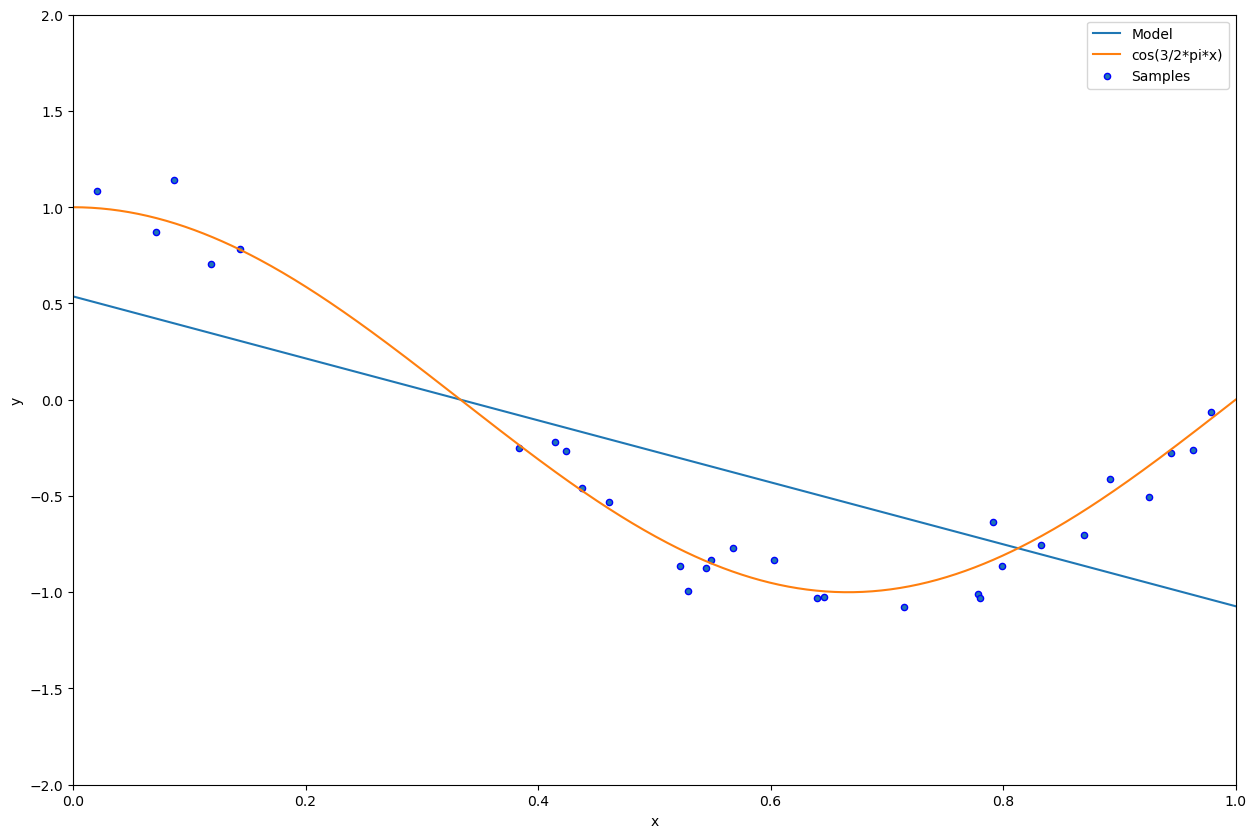

In [9]:
model_and_plot(1, X, y, X_test)

R2 score = 0.9973544184178598


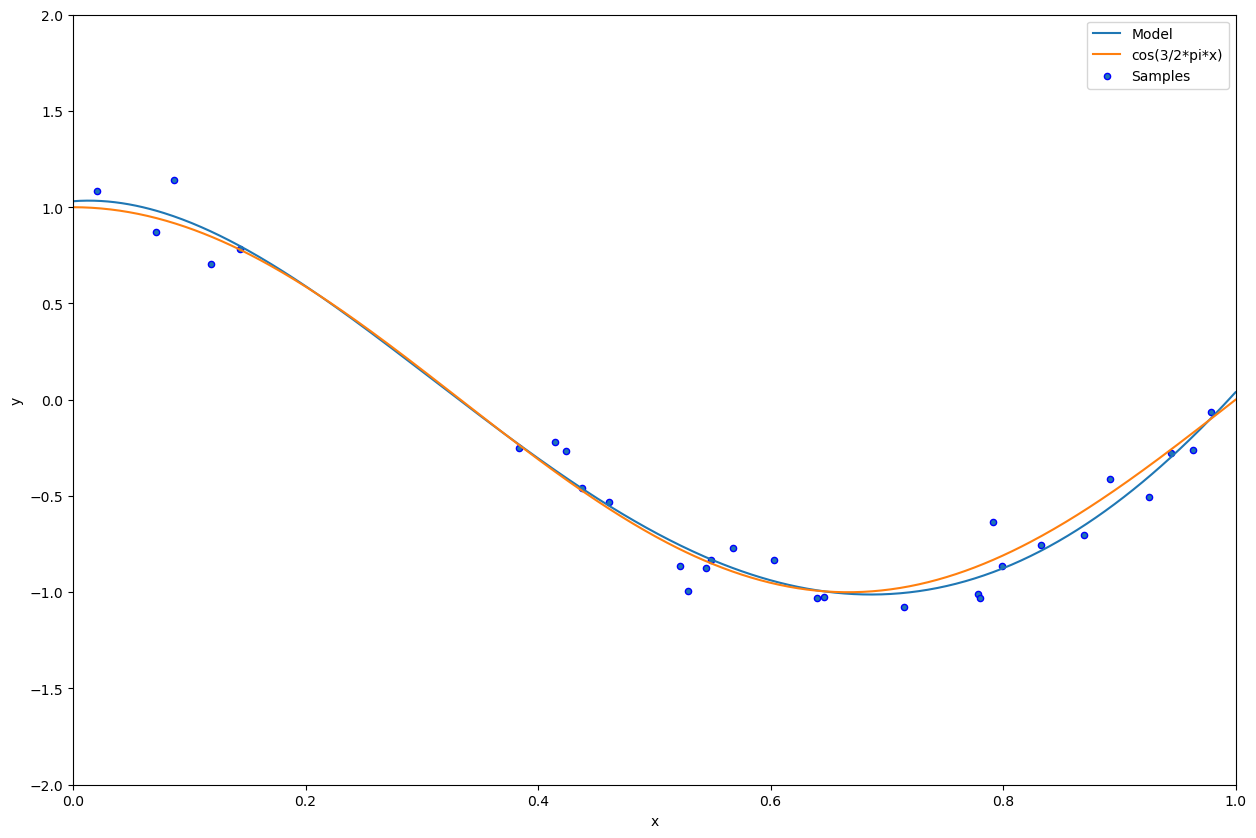

In [10]:
model_and_plot(4, X, y, X_test)

R2 score = -43045.80618184127


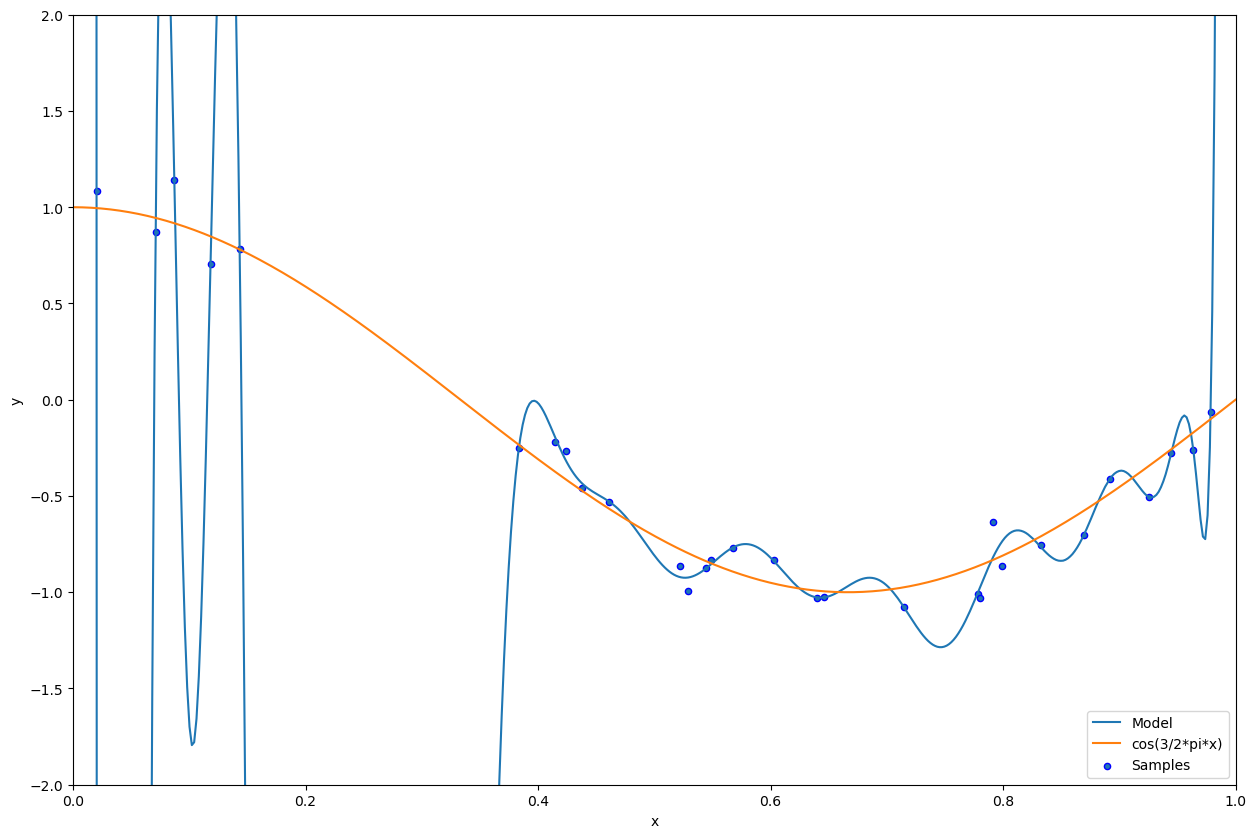

In [11]:
model_and_plot(35, X, y, X_test)